# Import

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import scorer, accuracy_score
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn

# Yahoo Historical Data from 1997 to 2017

In [47]:
df = pd.read_csv('^HSI.csv', index_col=0, na_values='null').dropna()
df.index = pd.to_datetime(df.index)
print(df.dtypes)
print(df[::len(df)-1])

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object
                    Open          High           Low         Close  \
Date                                                                 
1987-01-02   2540.100098   2540.100098   2540.100098   2540.100098   
2017-12-29  29914.050781  29997.960938  29849.310547  29919.150391   

               Adj Close        Volume  
Date                                    
1987-01-02   2540.100098  0.000000e+00  
2017-12-29  29919.150391  1.365771e+09  


# Close Price Plot

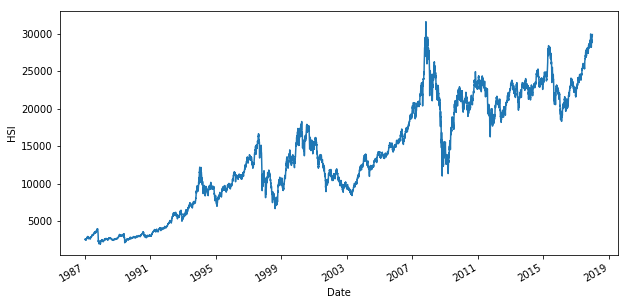

In [48]:
df['Close'].plot(figsize=(10,5))
plt.ylabel("HSI")
plt.show()

# Using Next Day Price Up Down as Target Variable

In [49]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1) # up or down

# Predictors by OHLC

generate and normalize the training data

In [61]:
df['Close-Open'] = (df['Close'] - df['Open']) / df['Open']
df['High-Low'] = (df['High'] - df['Low']) / df['Open']
X = df[['Close-Open','High-Low']]

# Split Train Test Data
Note train data must not include future data.  
More than 50% accuracy is profitable in the long run

In [62]:
split_percentage = 0.8
split = int(split_percentage*len(df))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]
cls = SVC().fit(X_train, y_train)
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))
print('Train Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))

Train Accuracy: 52.00%
Test Accuracy: 51.83%


# Continuous Return by SVC Classifier Prediction
Note not using simple return but continuous return  
Continuous return is addable as it is time consistent

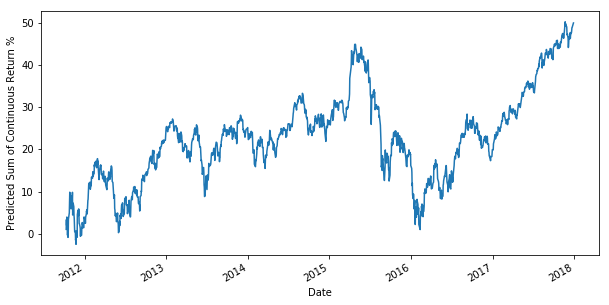

In [63]:
df['predicted'] = cls.predict(X)
df['return'] = np.log(df['Close'].shift(-1) / df['Close'])*100
df['predicted_return'] = df['return'] * df['predicted']
df['predicted_return'].iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Predicted Sum of Continuous Return %")
plt.show()